# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

Area: Şeklin alanını temsil eder. Bir nesnenin kapladığı toplam yüzey alanını ifade edebilir.
MajorAxisLength: Şeklin en uzun ekseni ya da çapını temsil eder. Bu, bir elipsin en uzun çapı olabilir.
MinorAxisLength: Şeklin en kısa ekseni ya da çapını belirtir. Elips şeklindeki bir nesnenin en kısa çapı olabilir.
Eccentricity: Şeklin düzensizlik derecesini ifade eder. 0 ile 1 arasında bir değer alır. Daireye yakın bir şeklin 0'a yakın, daha uzun ve dar bir yapıya sahip olanların ise 1'e yakın bir değeri olabilir.
ConvexArea: Şeklin dışbükey alanını temsil eder. Şeklin dış hatlarını birleştirerek elde edilen dışbükey bir şeklin alanını ifade edebilir.
Extent: Bir nesnenin alanının, kaplayabileceği maksimum alana oranını ifade eder. 0 ile 1 arasında bir değer alır. Alanın bir bölgenin ne kadarını kapladığını gösterir.
Perimeter: Şeklin çevresini temsil eder. Şeklin dış sınırlarının uzunluğunu ifade eder.
Class: Nesnelerin veya örneklerin ait olduğu sınıfı gösterir. Sınıflandırma problemlerinde kullanılan etiketleri içerir. Örneğin, bir nesnenin hangi kategoriye ait olduğunu belirtir.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [2]:

df = pd.read_excel(r"C:\Users\ibrahim\Desktop\Data Science\ML\TechrpoAssignment\Rain\Raisin_Dataset.xlsx")


In [3]:
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [6]:
df.duplicated().sum()

0

In [7]:
df2 = df.copy()

## Feature Engineering

In [8]:
df.select_dtypes(include ="object").head()

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen


In [9]:
df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [10]:
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [13]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246,253.291,0.820,90546,0.759,1184.040
1,75166,406.691,243.032,0.802,78789,0.684,1121.786
2,90856,442.267,266.328,0.798,93717,0.638,1208.575
3,45928,286.541,208.760,0.685,47336,0.700,844.162
4,79408,352.191,290.828,0.564,81463,0.793,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072
896,87350,440.736,259.293,0.809,90899,0.636,1214.252
897,99657,431.707,298.837,0.722,106264,0.741,1292.828
898,93523,476.344,254.176,0.846,97653,0.659,1258.548


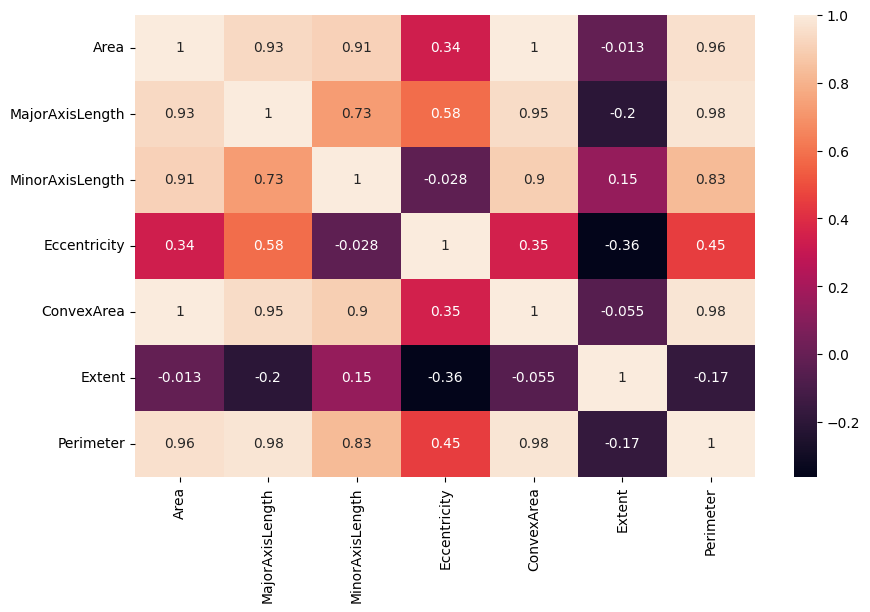

In [14]:
sns.heatmap(df_numeric.corr(), annot =True);

# Multicollinearity control

In [15]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()


True

In [16]:
def color_red(val):

    if val > 0.90 and val <= 0.999 or val <= -0.90 and val > -0.99999:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [17]:
df_numeric.corr().style.applymap(color_red)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


In [18]:
from scipy.stats import skew

In [19]:
for column in df_numeric:
    skewness = skew(df[column])
    print(f'{column}: Skewness = {skewness}')

Area: Skewness = 1.173277753987419
MajorAxisLength: Skewness = 0.9878941292690085
MinorAxisLength: Skewness = 0.7987153311294395
Eccentricity: Skewness = -1.3252897159085628
ConvexArea: Skewness = 1.2408315755758617
Extent: Skewness = -1.1495846874562732
Perimeter: Skewness = 1.016064035889089


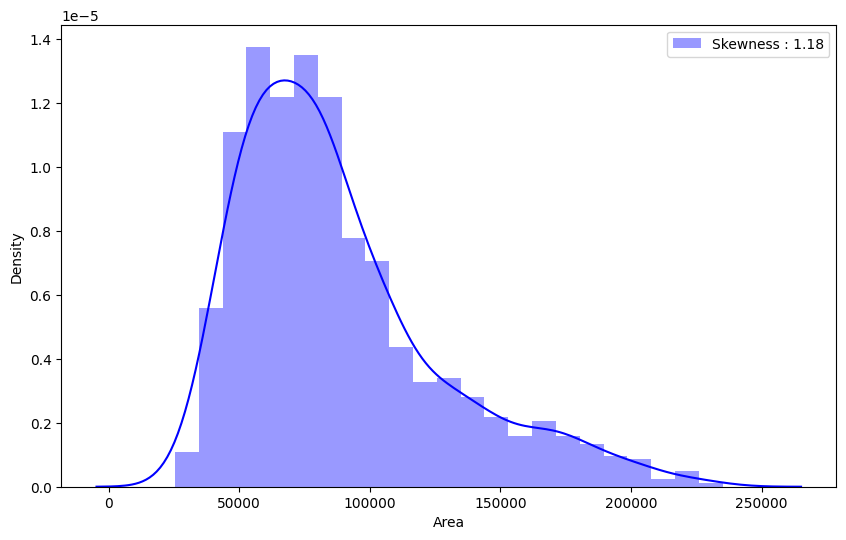

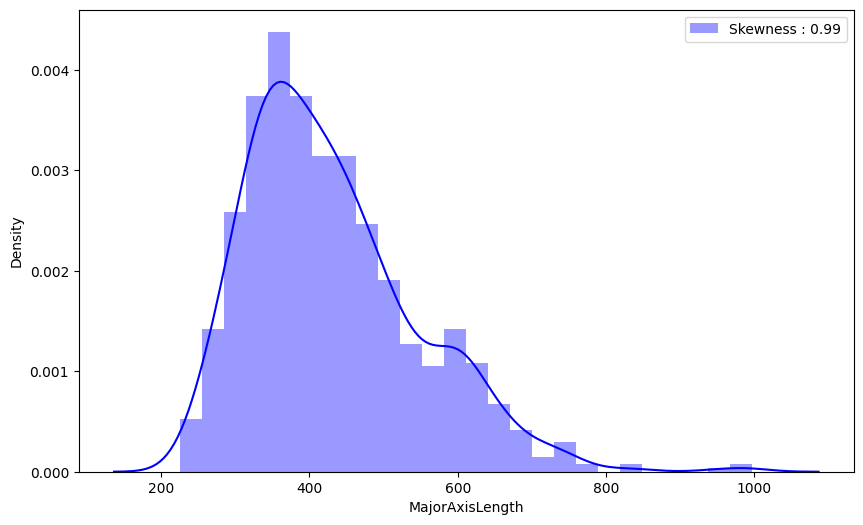

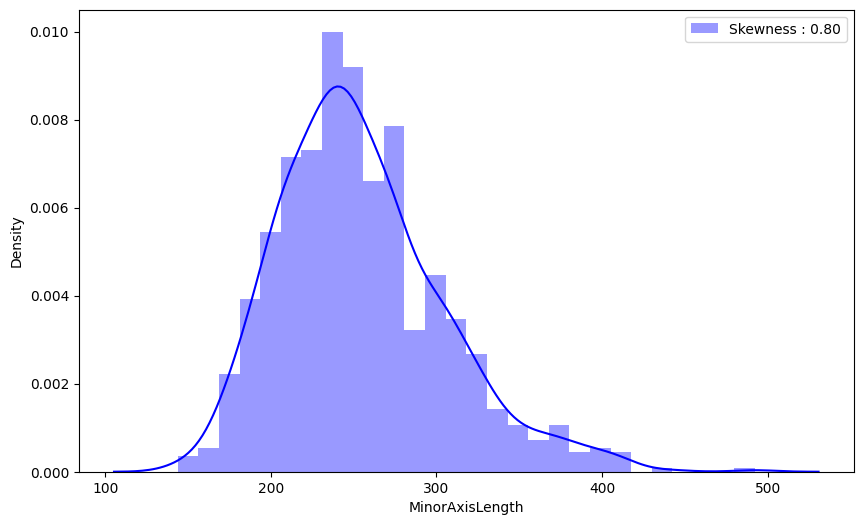

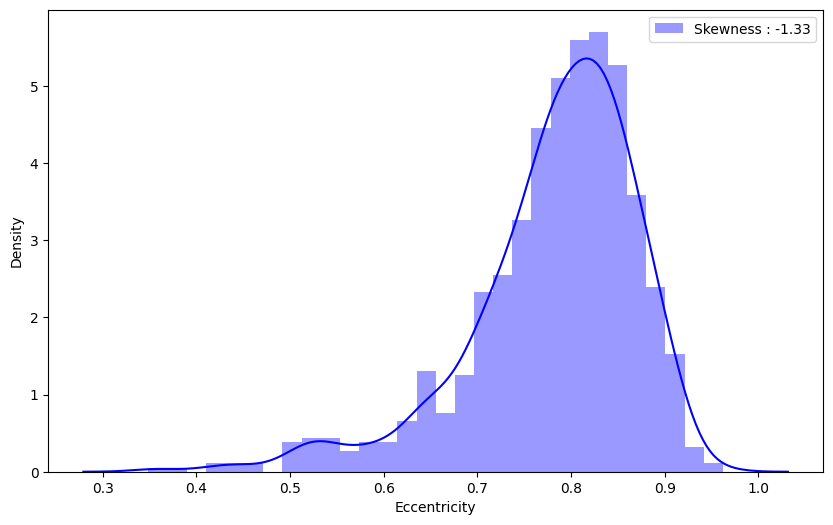

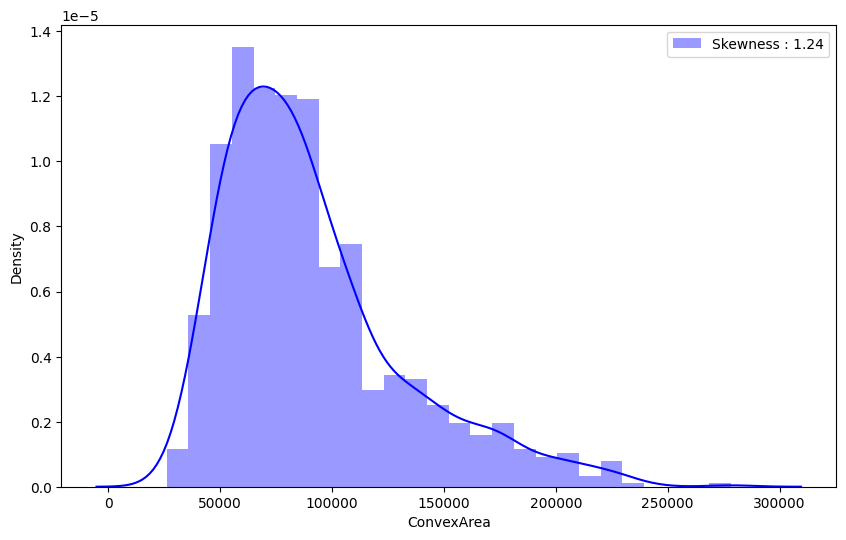

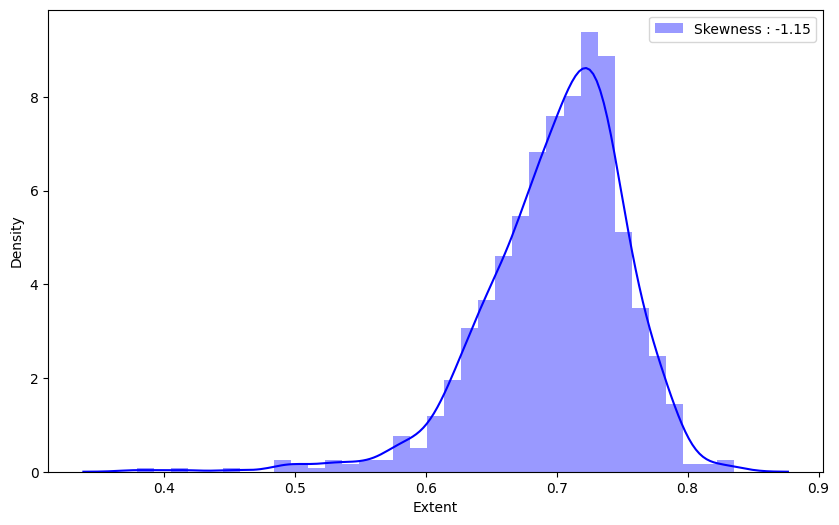

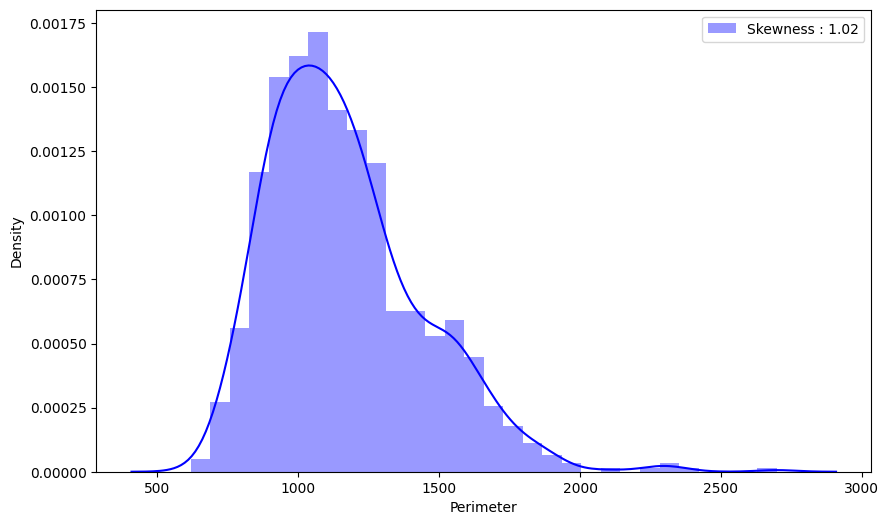

In [18]:
for j in df_numeric:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

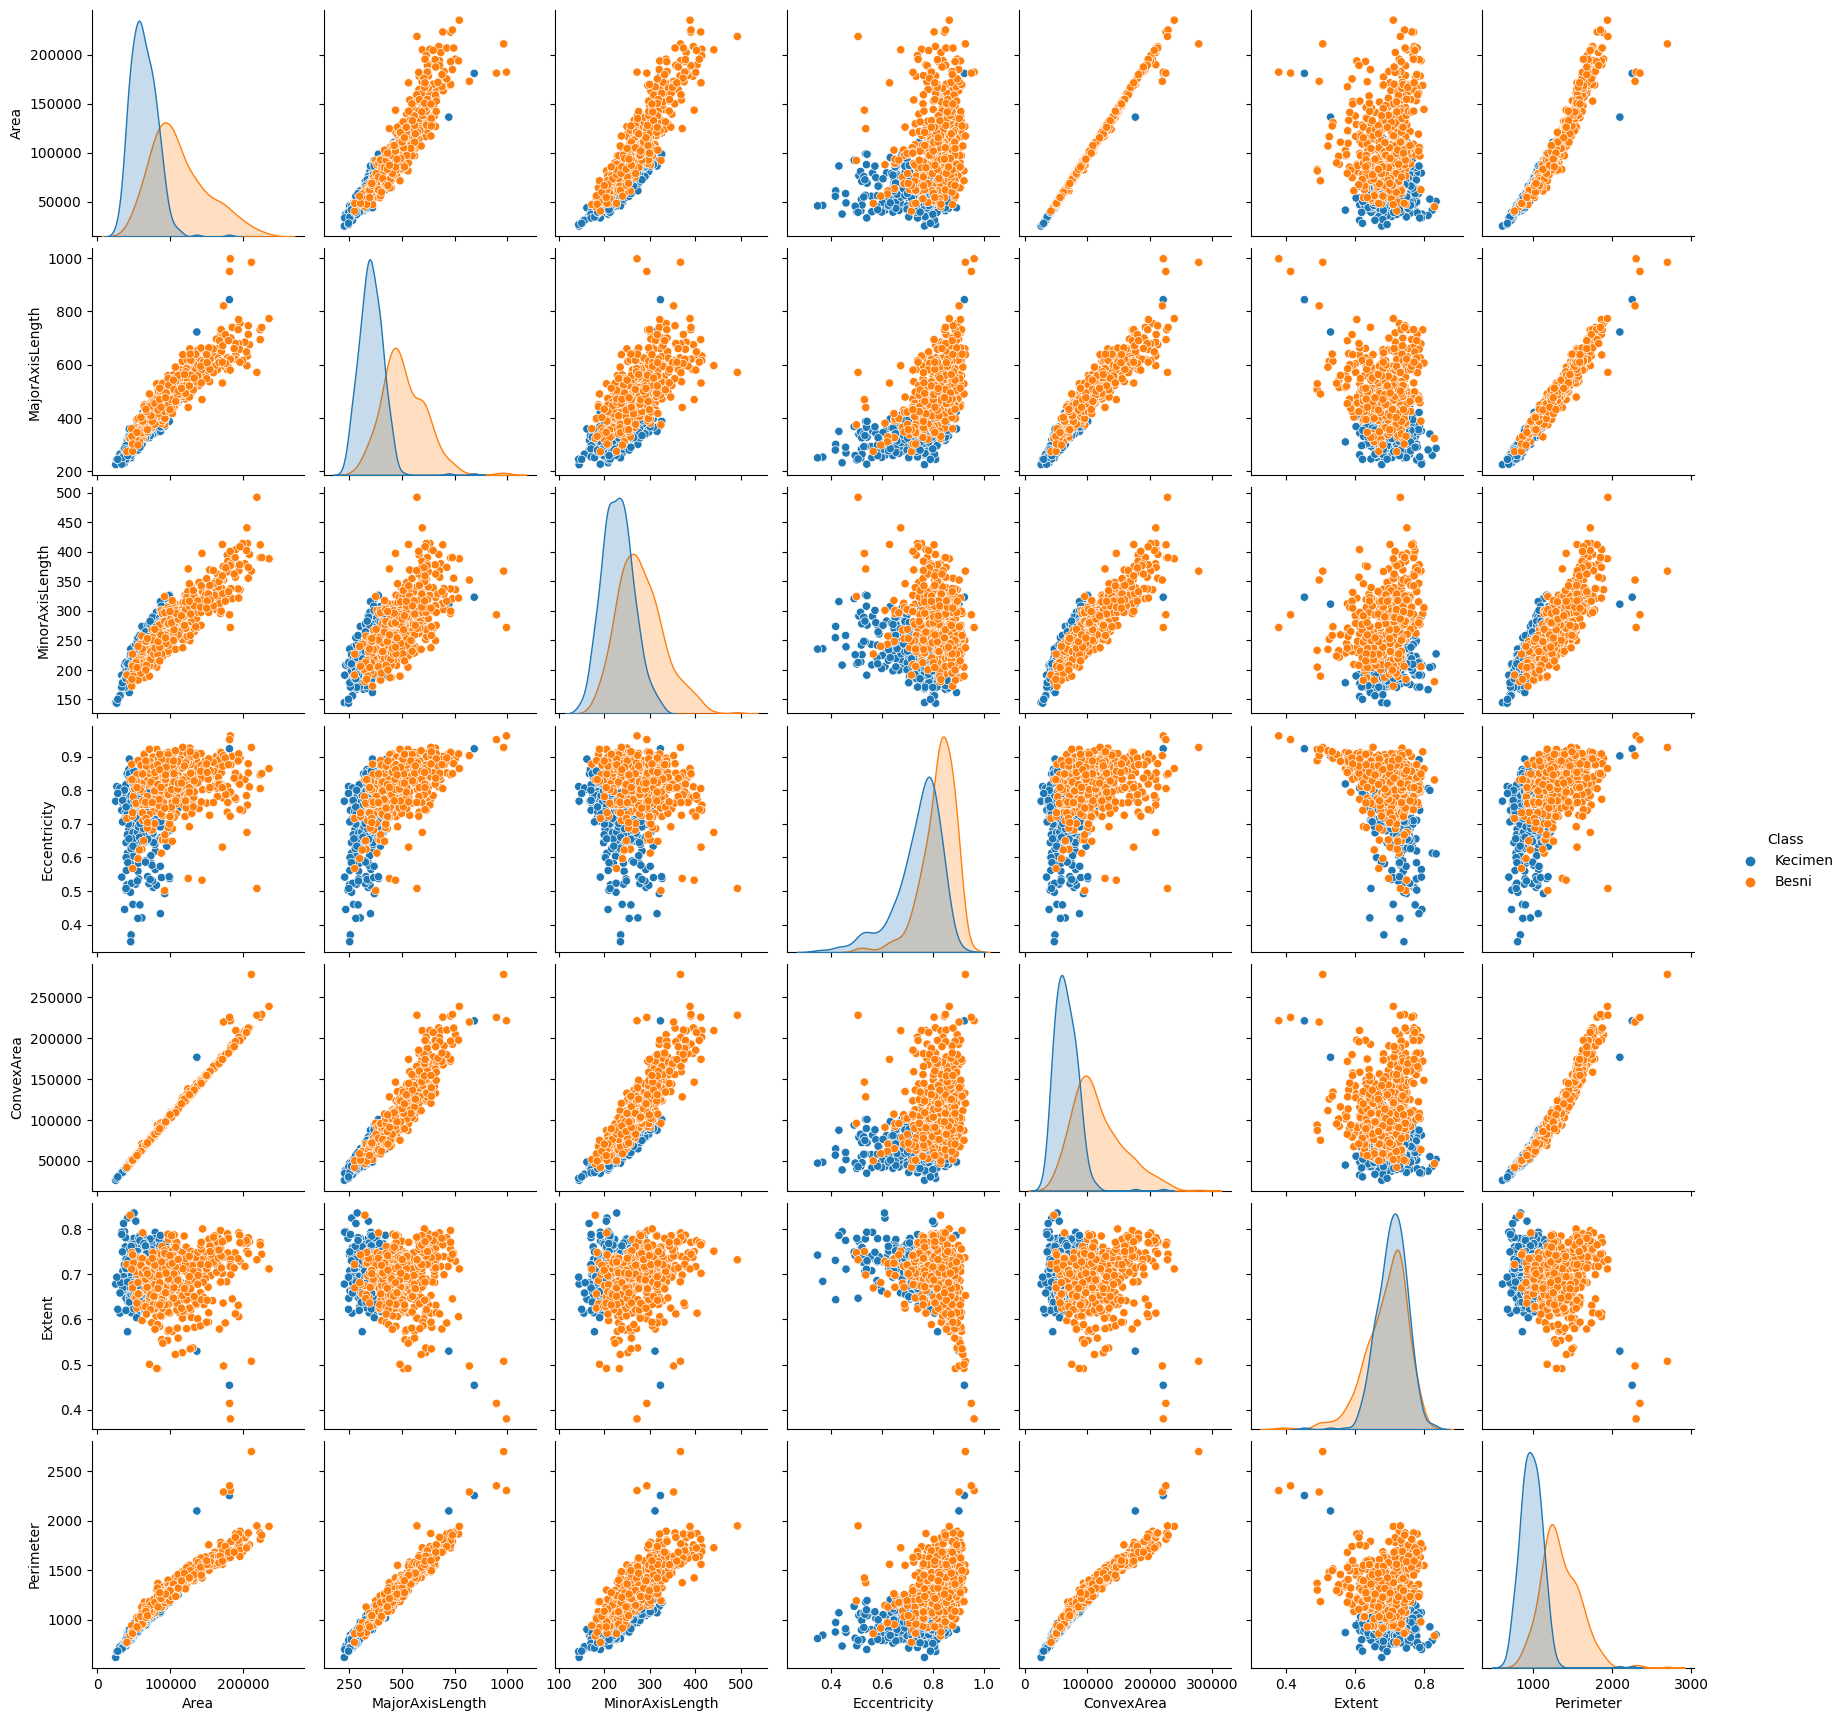

In [19]:
sns.pairplot(df, hue="Class");

##Outlier Handling

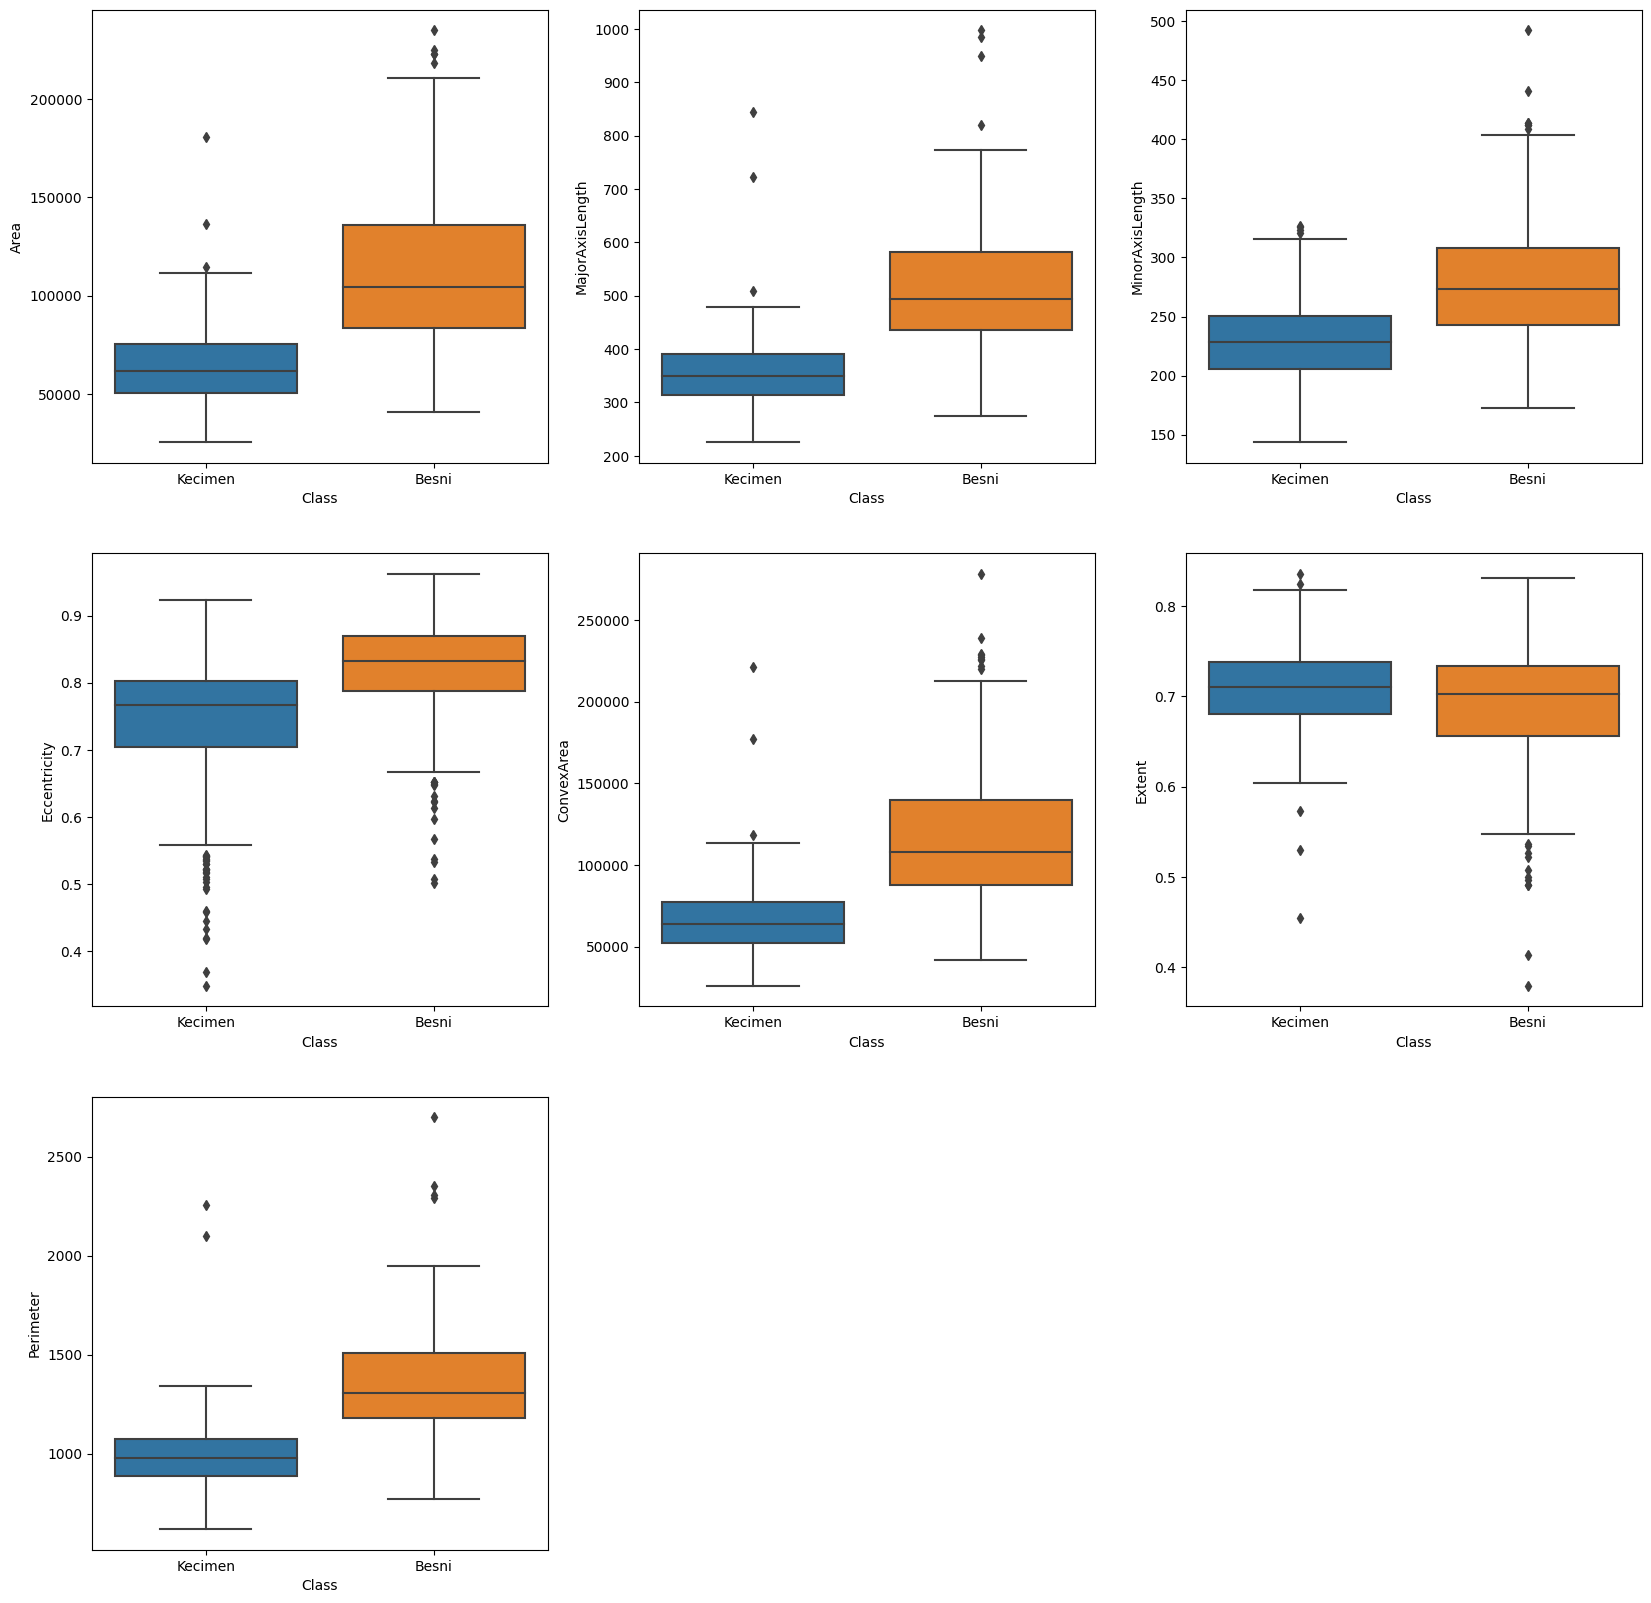

In [20]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()


I kept the outliers because they seem not big deal

## Train | Test Split and Scaling

In [20]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [24]:
X = df.drop ("Class", axis=1)
y =df.Class

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
10,80437,449.455,232.326,0.856,84460,0.674,1176.305
334,72483,334.418,282.681,0.534,74945,0.706,1052.159
244,85739,380.370,288.256,0.652,87052,0.762,1094.576
678,182788,621.207,379.424,0.792,188848,0.733,1679.075
306,62835,421.169,191.170,0.891,64406,0.786,1018.553
...,...,...,...,...,...,...,...
106,48945,269.370,239.162,0.460,51456,0.711,872.289
270,54968,300.954,234.390,0.627,56851,0.751,893.644
860,166654,607.996,349.659,0.818,169060,0.754,1574.164
435,28216,245.401,150.246,0.791,30316,0.622,683.004


In [27]:
y_train.value_counts()

Besni      364
Kecimen    356
Name: Class, dtype: int64

In [28]:
log_model1 = LogisticRegression()

In [29]:
log_model1.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred1 = log_model1.predict(X_test)

#### Vanilla Score

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [33]:
eval_metric(log_model1, X_train, y_train, X_test, y_test)

Test_Set
[[74 12]
 [15 79]]
              precision    recall  f1-score   support

       Besni       0.83      0.86      0.85        86
     Kecimen       0.87      0.84      0.85        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180


Train_Set
[[304  60]
 [ 44 312]]
              precision    recall  f1-score   support

       Besni       0.87      0.84      0.85       364
     Kecimen       0.84      0.88      0.86       356

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



## Scale

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_model = LogisticRegression()

In [40]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Predict

In [41]:
y_pred = log_model.predict(X_test_scaled)

In [42]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [43]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(20)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
542,140897,588.071,308.026,0.852,146231,0.734,1536.473,Besni,Besni,0.010
745,78161,453.203,222.605,0.871,81689,0.733,1161.291,Besni,Besni,0.314
294,70196,373.198,243.881,0.757,71937,0.691,1024.256,Kecimen,Kecimen,0.758
30,88745,429.770,265.690,0.786,90715,0.752,1162.877,Kecimen,Besni,0.447
76,75825,391.204,248.500,0.772,77437,0.745,1081.339,Kecimen,Kecimen,0.671
110,81572,393.716,265.815,0.738,84964,0.698,1187.338,Kecimen,Besni,0.485
837,142419,580.438,318.181,0.836,145899,0.755,1512.658,Besni,Besni,0.014
774,76624,473.966,207.737,0.899,80356,0.661,1205.819,Besni,Besni,0.167
744,53077,327.288,212.231,0.761,55532,0.646,934.708,Besni,Kecimen,0.875
518,64303,442.745,187.029,0.906,67199,0.686,1081.680,Besni,Besni,0.393


In [44]:
#!pip uninstall scikit-learn -y
#!pip install -U scikit-learn==0.24.2

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

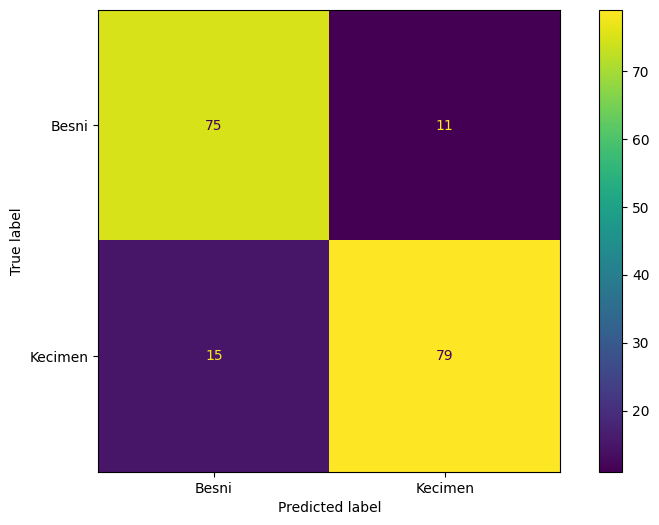

In [46]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

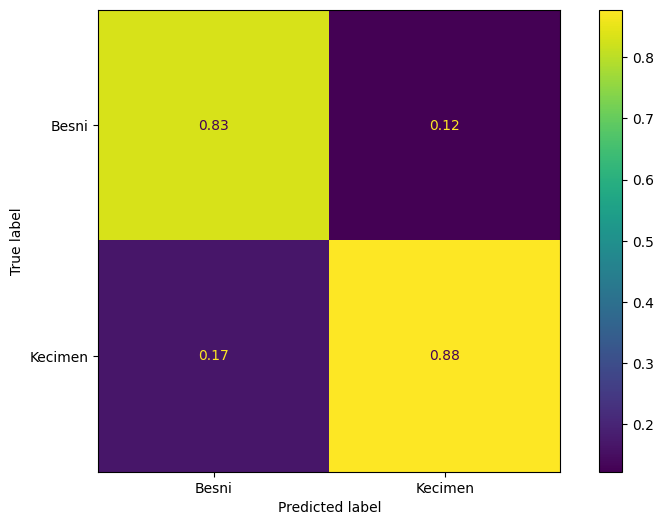

In [47]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize = 'pred')

## Model Performance

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [15 79]]
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[308  56]
 [ 39 317]]
              precision    recall  f1-score   support

       Besni       0.89      0.85      0.87       364
     Kecimen       0.85      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



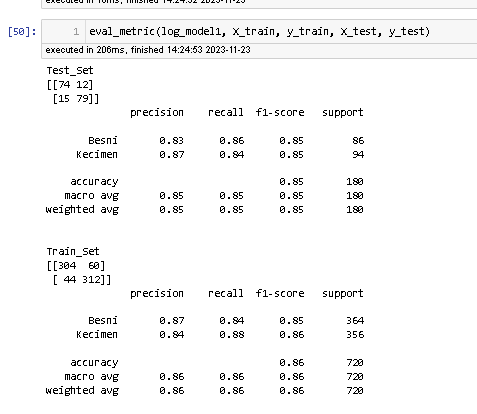

##### Model Evaluation Summary
Overall, it can be observed that the model exhibits slight increase of performance on scaled datasets. The results  indicate that the model can generalize well to new data and demonstrates good performance. 

### Cross Validate

In [50]:
from sklearn.model_selection import cross_validate

In [51]:

model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.868
test_precision_weighted   0.872
test_recall_weighted      0.868
test_f1_weighted          0.868
dtype: float64

# Cross Validate for Besni

## CV for one class

In [80]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
f1_Besni = make_scorer(f1_score, average = None, labels =["Besni"])
precision_Besni = make_scorer(precision_score, average = None, labels =["Besni"])
recall_Besni = make_scorer(recall_score, average = None, labels =["Besni"])

In [81]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_Besni":f1_Besni,
                                                                   "precision_Besni":precision_Besni,
                                                                   "recall_Besni":recall_Besni}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Besni          0.866
test_precision_Besni   0.890
test_recall_Besni      0.846
dtype: float64

## Class prediction

In [70]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_Besni"] = y_pred_proba[:,0]
test_data["pred_proba_Kecimen"] = y_pred_proba[:,1]
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba_Besni,pred_proba_Kecimen
652,98464,488.215,261.724,0.844,101977,0.679,1259.069,Besni,Besni,0.865,0.135
381,31237,262.347,155.026,0.807,32564,0.614,718.847,Kecimen,Kecimen,0.028,0.972
626,103057,548.405,241.123,0.898,107983,0.716,1391.207,Besni,Besni,0.967,0.033
625,96210,482.512,262.674,0.839,102157,0.687,1270.564,Besni,Besni,0.860,0.140
603,136180,551.454,316.470,0.819,139701,0.730,1461.030,Besni,Besni,0.975,0.025
756,149841,547.456,354.585,0.762,155682,0.712,1544.342,Besni,Besni,0.984,0.016
542,140897,588.071,308.026,0.852,146231,0.734,1536.473,Besni,Besni,0.990,0.010
309,45160,270.555,220.119,0.581,46805,0.686,833.117,Kecimen,Kecimen,0.019,0.981
165,59970,353.002,219.683,0.783,61834,0.756,978.631,Kecimen,Kecimen,0.151,0.849
367,56518,319.192,230.710,0.691,58879,0.719,916.396,Kecimen,Kecimen,0.064,0.936


### GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [73]:
# Bu kod bloğu hata veriyor. spesifik Python sürümü istediği için aşağıdaki kod kullandık

#GridSearchCV ile recall iyileştirmek için parametreleri ve değerleri ayarlayıp  1 skorunun değerini iyileştirip hastalaı yakalama oranını artırmak.
model = LogisticRegression()
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", # 1 class ait en iyi skoru döndürecek, tek score verebiliriz
                          n_jobs = -1)




In [74]:
# hata alınıyorsa bu kod bloğu
grid_model = LogisticRegression(C = 0.1, class_weight = "balanced", penalty = "l1", solver = "liblinear")

In [75]:
grid_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [76]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [15 79]]
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[302  62]
 [ 32 324]]
              precision    recall  f1-score   support

       Besni       0.90      0.83      0.87       364
     Kecimen       0.84      0.91      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



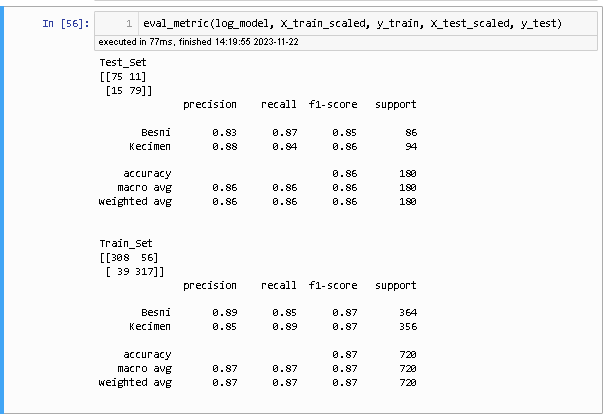

#### Model Evaluation Summary
Overall, it can be observed that the model exhibits similar performance datasets. However, it's important to note that high performance for the "Besni" class for all models.


## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

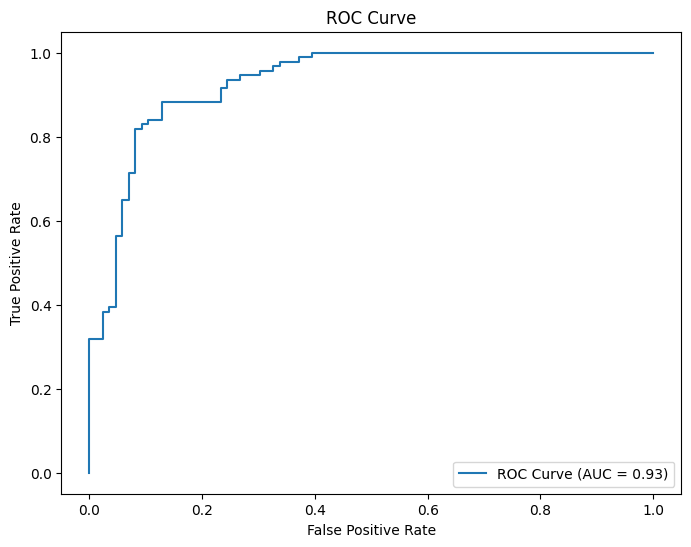

In [77]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


# Binarize the labels
y_test_binary = label_binarize(y_test, classes= [ 'Besni', 'Kecimen',])

# Assuming y_pred_proba is your predicted probabilities for both classes
# Assuming y_pred_proba[:, 1] is the probability for the positive class ('Besni')
fpr, tpr, _ = roc_curve(y_test_binary[:, 0], y_pred_proba[:, 1])

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve


In [78]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show() #Dengeli datalarda bu skora bakacağız

NameError: name 'plot_roc_curve' is not defined

In [79]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show() # Dengesiz datalarda bu skora bakacağız

NameError: name 'plot_precision_recall_curve' is not defined

## Variance Inflation Factor

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Multicollinearity'yi ele almak için VIF değerlerini hesapla
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# VIF değerlerini incele
vif_result = calculate_vif(X)
print("VIF Değerleri:")
print(vif_result)

# Yüksek VIF değerine sahip değişkenleri çıkar
high_vif_variables = vif_result[vif_result["VIF"] > 10]["Variable"]
X_low_vif = X.drop(high_vif_variables, axis=1)

# Eğitim ve test seti oluştur
X_train, X_test, y_train, y_test = train_test_split(X_low_vif, y, test_size=0.2, random_state=42)

# X_low_vif'te en az bir sütun varsa
if not X_low_vif.empty:
    # Logistik regresyon modelini eğit
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Test seti üzerinde modeli değerlendir
    y_pred = model.predict(X_test)
    print("Eğitim Seti Classification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("Tüm değişkenlerin VIF değerleri yüksek. Lütfen başka bir strateji deneyin.")


VIF Değerleri:
          Variable      VIF
0             Area 2276.502
1  MajorAxisLength 1894.686
2  MinorAxisLength  778.343
3     Eccentricity  256.075
4       ConvexArea 2678.790
5           Extent  194.790
6        Perimeter 3518.698
Tüm değişkenlerin VIF değerleri yüksek. Lütfen başka bir strateji deneyin.


#### VIF değerleri yüksek threshold  vererek model performansından feature çıkarıldığında skor karşılaştırma

In [53]:
# Function to calculate VIF values
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Explore VIF values
vif_result = calculate_vif(X)
print("VIF Values:")
print(vif_result)

# Evaluate the model by removing variables with high VIF values one by one
selected_features = list(X.columns)
dropped_features = []
while len(selected_features) > 0:
    # Train the model with the selected variables
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = model.score(X_test, y_test)

    # If model performance is acceptable, exit
    if accuracy > 0.80:
        print("Acceptable Model Performance Achieved.")
        break
    else:
        # Remove the variable with the highest VIF
        max_vif_index = vif_result["VIF"].idxmax()
        dropped_feature = selected_features.pop(max_vif_index)
        dropped_features.append(dropped_feature)
        print(f"{dropped_feature} dropped. Model performance: {accuracy:.4f}")

# Train the final model with the selected variables and evaluate performance
final_X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)
final_model = LogisticRegression()
final_model.fit(X_train, y_train)
final_y_pred = final_model.predict(X_test)
print("Final Model Classification Report:")
print(classification_report(y_test, final_y_pred))


VIF Values:
          Variable      VIF
0             Area 2276.502
1  MajorAxisLength 1894.686
2  MinorAxisLength  778.343
3     Eccentricity  256.075
4       ConvexArea 2678.790
5           Extent  194.790
6        Perimeter 3518.698
Acceptable Model Performance Achieved.
Final Model Classification Report:
              precision    recall  f1-score   support

       Besni       0.83      0.86      0.85        86
     Kecimen       0.87      0.84      0.85        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



# K-Nearest Neighbors

## Modelling

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [57]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [58]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array(['Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'B

In [59]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [60]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.800,0.200
1,0.200,0.800
2,0.000,1.000
3,1.000,0.000
4,0.000,1.000
...,...,...
175,0.800,0.200
176,1.000,0.000
177,1.000,0.000
178,0.000,1.000


In [61]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[72 14]
 [16 78]]
              precision    recall  f1-score   support

       Besni       0.82      0.84      0.83        86
     Kecimen       0.85      0.83      0.84        94

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180


Train_Set
[[309  55]
 [ 28 328]]
              precision    recall  f1-score   support

       Besni       0.92      0.85      0.88       364
     Kecimen       0.86      0.92      0.89       356

    accuracy                           0.88       720
   macro avg       0.89      0.89      0.88       720
weighted avg       0.89      0.88      0.88       720



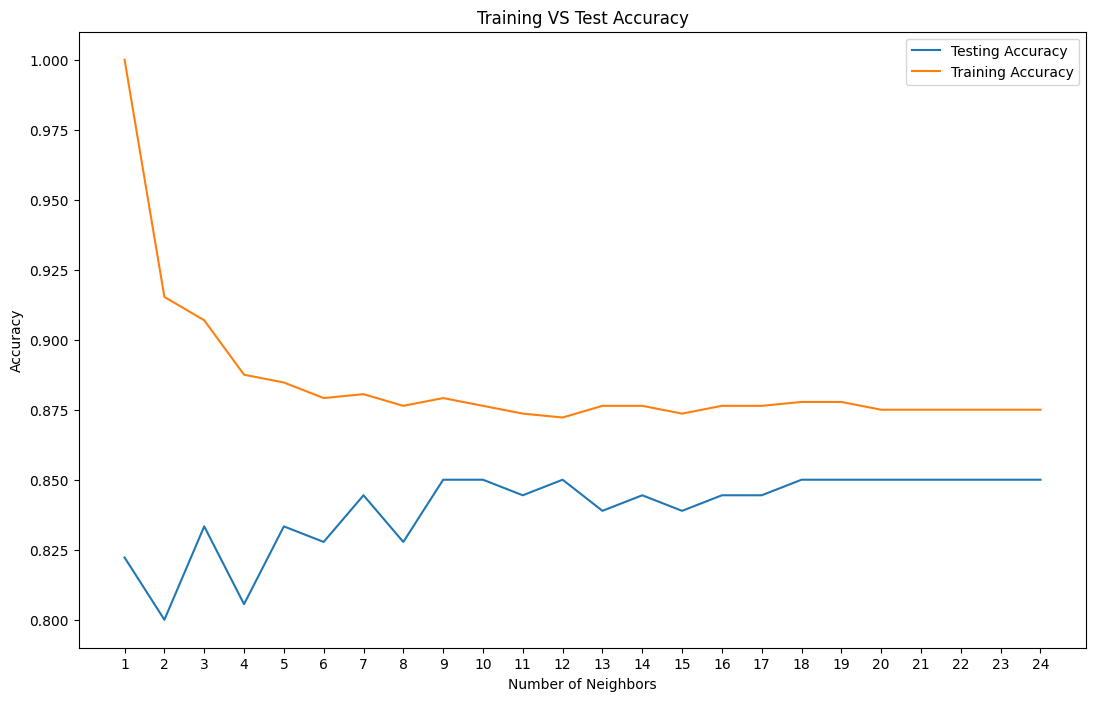

Best accuracy is 0.85 with K = 9


In [62]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train_scaled,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train_scaled, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test_scaled, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Training VS Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
#plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [63]:
df3 = df2[["Area", "MajorAxisLength", "Perimeter", "Class"]]

# Bağımsız değişkenler ve hedef değişkeni ayır
X = df3.drop("Class", axis=1)
y = df3["Class"]

# Seçilen değişkenlerle modeli eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistik regresyon modelini eğit
model = LogisticRegression()
model.fit(X_train, y_train)

# Test seti üzerinde modeli değerlendir
y_pred = model.predict(X_test)
print("Test Seti Classification Report:")
print(classification_report(y_test, y_pred))


Test Seti Classification Report:
              precision    recall  f1-score   support

       Besni       0.83      0.83      0.83        86
     Kecimen       0.84      0.84      0.84        94

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180



In [66]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l2', 'l1' ]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(X_train_scaled,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.8541666666666666


## Final Model

In [67]:
scaler = StandardScaler().fit(X)

In [70]:
X_scaled = scaler.transform(X)

In [71]:
final_model = LogisticRegression(C= 0.1 , penalty= "l2").fit(X_scaled, y)

In [72]:
y_pred = final_model.predict(X_scaled)

In [73]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[374  76]
 [ 55 395]]
              precision    recall  f1-score   support

       Besni       0.87      0.83      0.85       450
     Kecimen       0.84      0.88      0.86       450

    accuracy                           0.85       900
   macro avg       0.86      0.85      0.85       900
weighted avg       0.86      0.85      0.85       900



# Conclusion

Results appear quite satisfactory as there's consistent performance across both the test set and main dataset.

An accuracy rate of 85% indicates the model's success on the  data. High and balanced Precision, Recall, and F1-score values are observed for both classes, demonstrating strong and consistent performance.